![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

# Exercises
## The Sakila Database

One of the best example databases out there is the <a href="https://dev.mysql.com/doc/sakila/en/">Sakila Database</a>, which was originally created by MySQL and has been open sourced under the terms of the BSD License.

The Sakila database is a nicely normalised schema modelling a DVD rental store, featuring things like films, actors, film-actor relationships, and a central inventory table that connects films, stores, and rentals.

<img width="1200px" src="https://user-images.githubusercontent.com/7065401/58504872-fa243b00-8161-11e9-85ed-4b7d8d7ce9f7.png" />

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [2]:
conn = sqlite3.connect('data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [ ]:
df.head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `film_rental_duration`?

In [3]:
# your code goes here
df['film_rental_duration'].mean()

4.935489902767389

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the most common rental duration?

Show a <b>bar plot</b> with all the durations.

<AxesSubplot: xlabel='film_rental_duration'>

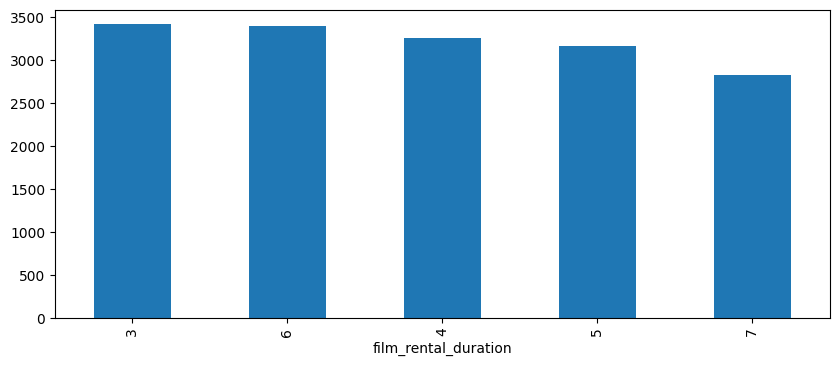

In [4]:
# your code goes here
df['film_rental_duration'].value_counts().plot(kind = 'bar', figsize = (10, 4))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the most common rental rate?

- Show a <b>pie plot</b> with all possible rental rates.
- Show a <b>bar plot</b> with all possible rental rates.
- Which plot you think fits the best in this case? Why?

<AxesSubplot: ylabel='count'>

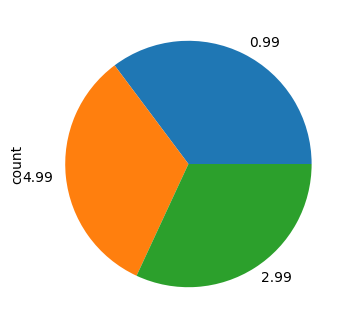

In [5]:
# your code goes here
df['film_rental_rate'].value_counts().plot(kind = 'pie', figsize = (4, 4))

<AxesSubplot: xlabel='film_rental_rate'>

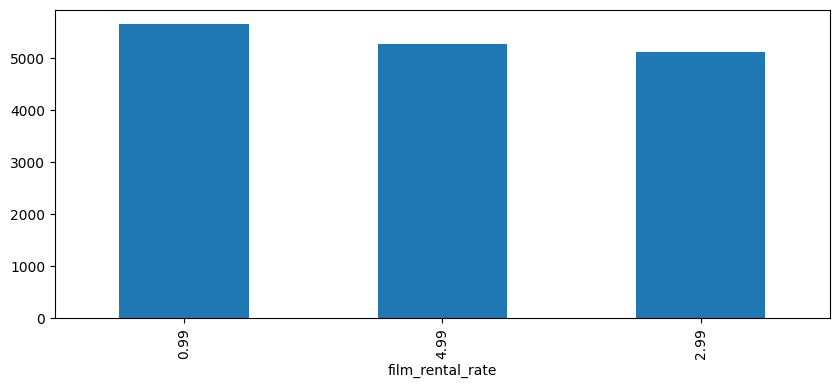

In [6]:
# your code goes here
df['film_rental_rate'].value_counts().plot(kind = 'bar', figsize = (10, 4))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How is the replacement cost distributed?

- Show a <b>box plot</b> of the replacement costs.
- Show a <b>density plot</b> of the replacement costs.
- Add a red line on the <b>mean</b>.
- Add a green line on the median <b>median</b>.

<AxesSubplot: >

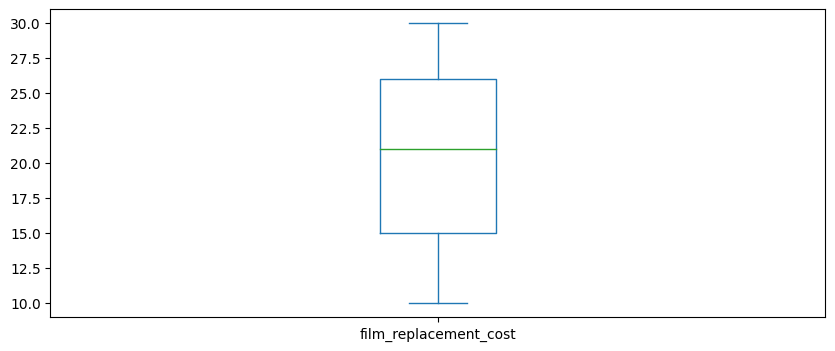

In [8]:
# your code goes here
df['film_replacement_cost'].plot(kind = 'box', figsize = (10, 4))

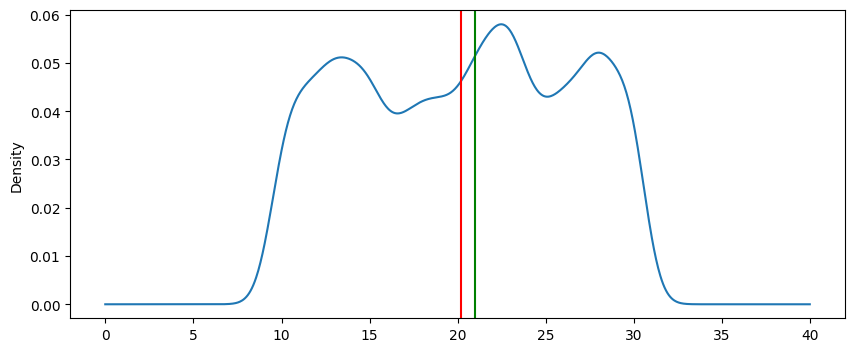

In [14]:
# your code goes here
ax = df['film_replacement_cost'].plot(kind = 'density', figsize = (10, 4))
ax.axvline(df['film_replacement_cost'].mean(), color = 'red')
ax.axvline(df['film_replacement_cost'].median(), color = 'green')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many films of each rating do we have?

- Show the raw count of each film rating.
- Show a <b>bar plot</b> with all possible film ratings.

In [15]:
# your code goes here
df['film_rating'].value_counts()

film_rating
PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: count, dtype: int64

<AxesSubplot: xlabel='film_rating'>

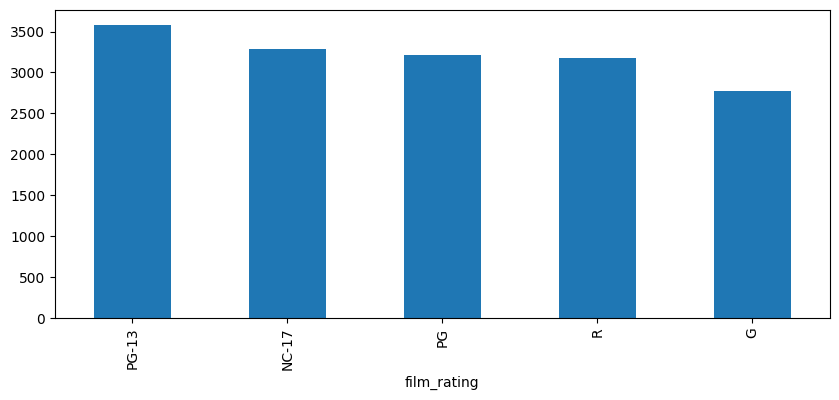

In [16]:
# your code goes here
df['film_rating'].value_counts().plot(kind = 'bar', figsize = (10, 4))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Does the film replacement cost vary depending on film rating?

In the United States, film classification is a voluntary process with the ratings issued by the Motion Picture Association of America (MPAA) via the Classification and Rating Administration (CARA).

- G (General Audiences): All Ages are Admitted.
- PG (Parental Guidance Suggested): Some Material May Not Be Suitable for Children.
- PG-13 (Parents Strongly Cautioned): Some Material May Be Inappropriate for Children Under 13.
- R (Restricted): Under 17 Requires Accompanying Parent or Adult Guardian.
- NC-17 (Adults Only): No One 17 and Under Admitted.

Show a <b>grouped box plot</b> per film rating with the film replacement costs.

<AxesSubplot: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

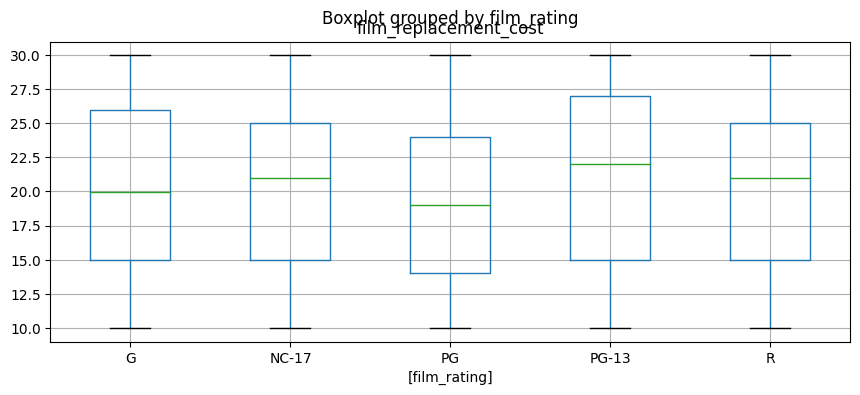

In [17]:
# your code goes here
df[['film_replacement_cost', 'film_rating']].boxplot(by = 'film_rating', figsize = (10, 4))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `rental_days` column

This numeric column should have the count of days between `rental_date` and `return_date`.

In [31]:
# your code goes here
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis = 1)
df['rental_days']

rental_id
1        1.0
2        3.0
3        7.0
4        9.0
5        8.0
        ... 
16045    2.0
16046    3.0
16047    1.0
16048    7.0
16049    6.0
Name: rental_days, Length: 16044, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analyze the distribution of `rental_days`

- Calculate the mean of `rental_days`.
- Show a <b>density (KDE)</b> of `rental_days`.

In [32]:
# your code goes here
df['rental_days'].mean()

4.525944139713763

<AxesSubplot: ylabel='Density'>

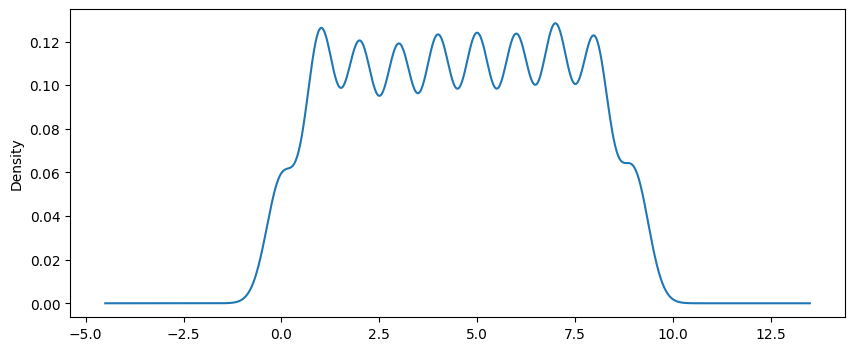

In [33]:
# your code goes here
df['rental_days'].plot(kind = 'density', figsize = (10, 4))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `film_daily_rental_rate` column

This value should be the division of `film_rental_rate` by `film_rental_duration`.

In [34]:
# your code goes here
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']
df['film_daily_rental_rate']

rental_id
1        0.427143
2        0.427143
3        0.427143
4        0.165000
5        0.598000
           ...   
16045    0.198000
16046    0.165000
16047    0.247500
16048    1.247500
16049    0.247500
Name: film_daily_rental_rate, Length: 16044, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Analyze the distribution of `film_daily_rental_rate`

- Calculate the mean of `film_daily_rental_rate`.
- Show a <b>density (KDE)</b> of `film_daily_rental_rate`.

In [35]:
# your code goes here
df['film_daily_rental_rate'].mean()

0.6458262471655329

<AxesSubplot: ylabel='Density'>

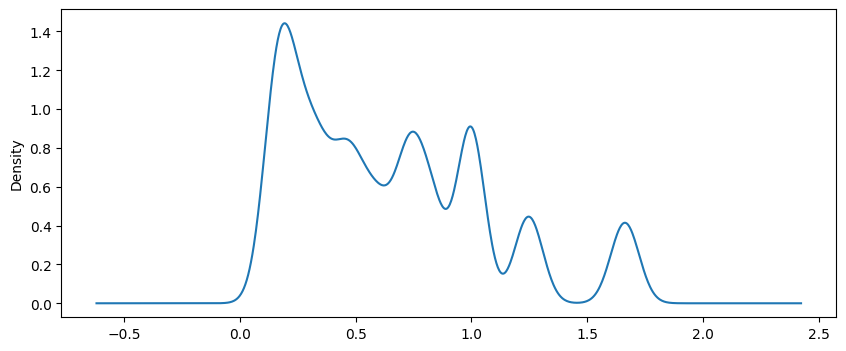

In [36]:
# your code goes here
df['film_daily_rental_rate'].plot(kind = 'density', figsize = (10, 4))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### List 10 films with the lowest daily rental rate

In [43]:
# your code goes here
df.sort_values(['film_daily_rental_rate']).head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
14877,2005-08-22 03:39:56,2005-08-24 03:41:56,HERRERA,1,Lethbridge,DECEIVER BETRAYED,7,0.99,22.99,NC-17,2.0,0.141429
5734,2005-07-10 11:37:28,2005-07-16 11:10:28,BOWENS,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,5.0,0.141429
11899,2005-08-17 15:29:12,2005-08-24 17:41:12,PERRY,2,Woodridge,PRIMARY GLASS,7,0.99,16.99,G,7.0,0.141429
4210,2005-07-07 11:36:20,2005-07-16 12:38:20,WOFFORD,2,Woodridge,HOOK CHARIOTS,7,0.99,23.99,G,9.0,0.141429
7215,2005-07-27 09:24:00,2005-08-05 07:37:00,OLIVARES,2,Woodridge,MOON BUNCH,7,0.99,20.99,PG,8.0,0.141429
1268,2005-06-15 07:29:30,2005-06-23 12:36:30,BURNS,1,Lethbridge,SIEGE MADRE,7,0.99,23.99,R,8.0,0.141429
7229,2005-07-27 10:00:54,2005-07-28 13:58:54,LANE,2,Woodridge,DECEIVER BETRAYED,7,0.99,22.99,NC-17,1.0,0.141429
7231,2005-07-27 10:01:51,2005-08-05 13:38:51,LONG,2,Woodridge,GILBERT PELICAN,7,0.99,13.99,G,9.0,0.141429
7235,2005-07-27 10:09:30,2005-08-05 11:44:30,NGO,1,Lethbridge,EMPIRE MALKOVICH,7,0.99,26.99,G,9.0,0.141429


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### List 10 films with the highest daily rental rate

In [44]:
# your code goes here
df.sort_values(['film_daily_rental_rate'], ascending = False).head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
14763,2005-08-21 23:34:00,2005-08-31 03:58:00,GIBSON,1,Lethbridge,FLINTSTONES HAPPINESS,3,4.99,11.99,PG-13,9.0,1.663333
7055,2005-07-27 03:45:42,2005-07-30 05:11:42,GRANT,1,Lethbridge,VELVET TERMINATOR,3,4.99,14.99,R,3.0,1.663333
7014,2005-07-27 02:14:40,2005-08-03 00:32:40,ELY,2,Woodridge,CLERKS ANGELS,3,4.99,15.99,G,6.0,1.663333
1855,2005-06-17 00:54:58,2005-06-20 19:29:58,KRAUS,2,Woodridge,WIFE TURN,3,4.99,27.99,NC-17,3.0,1.663333
11511,2005-08-16 23:39:59,2005-08-18 18:04:59,SCHRADER,2,Woodridge,INNOCENT USUAL,3,4.99,26.99,PG-13,1.0,1.663333
1849,2005-06-17 00:13:19,2005-06-23 18:37:19,MENARD,1,Lethbridge,MAIDEN HOME,3,4.99,9.99,PG,6.0,1.663333
1844,2005-06-16 23:53:53,2005-06-22 02:19:53,GRESHAM,2,Woodridge,KISSING DOLLS,3,4.99,9.99,R,5.0,1.663333
11503,2005-08-16 23:10:34,2005-08-25 03:55:34,SEAL,2,Woodridge,FOOL MOCKINGBIRD,3,4.99,24.99,PG,8.0,1.663333
1835,2005-06-16 23:05:36,2005-06-19 04:46:36,REYNOLDS,1,Lethbridge,FLINTSTONES HAPPINESS,3,4.99,11.99,PG-13,2.0,1.663333


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made in Lethbridge city?

In [45]:
# your code goes here
len(df.loc[df['rental_store_city'] == 'Lethbridge'])

7923

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals of each film rating were made in Lethbridge city?

Show a <b>bar plot</b> with each film rating count.

In [47]:
# your code goes here
df.loc[df['rental_store_city'] == 'Lethbridge']['film_rating'].value_counts()

film_rating
PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: count, dtype: int64

<AxesSubplot: xlabel='film_rating'>

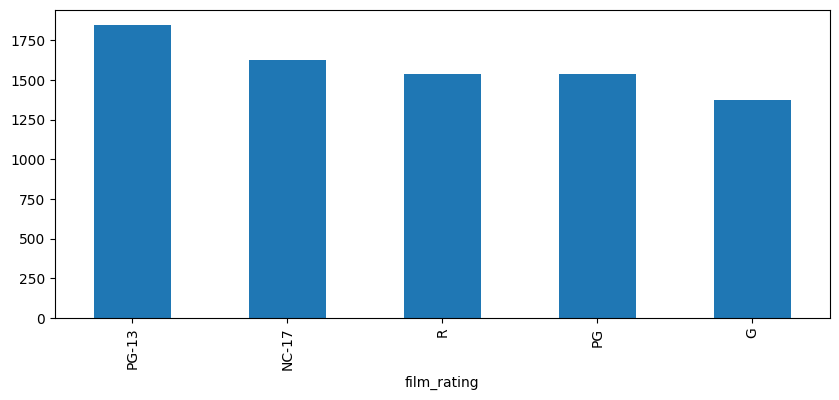

In [48]:
df.loc[df['rental_store_city'] == 'Lethbridge']['film_rating'].value_counts().plot(kind = 'bar', figsize = (10, 4))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made in Woodridge city with rental duration higher than 5 days?

In [50]:
# your code goes here
len(df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)])

3186

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?

In [51]:
# your code goes here
len(df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)])

8444

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)